In [46]:
import math
import time
from typing import *
import matplotlib.pyplot as plt
def speed_control(heading_angle:float, yaw:float, orientation:float, rps:float, x:float, y:float) -> Tuple[float, float, float, float, float, float, float, float, float, float]:
  """

  Args: 
    Heading Angle in degrees, 
    Yaw (Angular Velocity in rad/s), 
    Theta (Orientation w.r.t X-Y Plane) in degrees, 
    Rotations Per Second to calculate current velocity
    (X,Y) current X and Y co-ordinates of the Car

  Returns: 
    Safe Velocity w.r.t Heading Angle to to prevent Slipping and Toppling in m/s and km/h
    Beta which is the slipping angle w.r.t Centre of Mass and ICR on the Rear Axle in Degrees
    Instantaneous Radius of Curvature or Turning Radius of the car given input Heading Angle
    x_dot is the velocity in X-direction of the Original Frame of Reference
    y_dot is the velocity in Y-direction of the Original Frame of Reference
    Theta is the orientation similar to the input Theta but calculated on the inputs of RPS and Heading Angle and feeding back to the function again
    Yaw is the angular velocity of the vehicle derived using Slipping and Heading Angle
    (X,Y) current X and Y co-ordinates of the Car

  Notes:
    Co-Efficient of Friction mu = 0.6
    Accn due to gravity is 9.8 m/s2
    Theta and Yaw obtained are again given as a feedback to calculate X_Dot, Y_Dot, Theta
    Currently Theta is calculated using incremental method by adding the product of Yaw and Execution time of the Function

  """
  mu = 0.6
  g = 9.8
  start_time = time.time()
  vel = math.pi*2*rps*0.031
  heading_angle = -heading_angle*math.pi/180
  if (heading_angle != 0):
    R = math.sqrt(0.19**2 + 0.1825**2/(math.tan(heading_angle)**2))
    v = math.sqrt(mu*R*g)
  else:
    v = 8
    R = 0
  orientation = orientation*math.pi/180
  beta = math.atan(math.tan(heading_angle)/2)
  yaw = vel*math.tan(heading_angle)*math.cos(beta)    
  x_dot = vel*math.cos(beta+orientation)
  y_dot = vel*math.sin(beta+orientation)
  beta = beta*180/math.pi
  v_kmph = 3.6*v
  exec_time = time.time() - start_time 
  orientation = orientation + yaw*exec_time
  orientation = orientation*180/math.pi
  x = x + x_dot*exec_time
  y = y + y_dot*exec_time
  return v, vel, beta, R, x_dot, y_dot, orientation, yaw, x, y


In [47]:
speed_control(5, 0, 90, 0.5, 0, 0)

(3.5094677096366658,
 0.09738937226128358,
 -2.5047687215366006,
 2.0946196607112966,
 0.004256162731299838,
 0.09729632525564141,
 89.99998941837563,
 -0.008512325462599675,
 9.234209264475949e-08,
 2.110949897352068e-06)

-114.1380244522197
-1.710602179795483
9.738937226128359


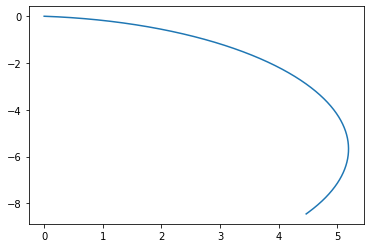

In [65]:
start_time = time.time()
seconds = 2
phi = 10
yaw = 0
orientation = 0
rps = 50
x = 0
y = 0
x_list = []
y_list = []
while True:
    current_time = time.time()
    elapsed_time = current_time - start_time
    v, vel, beta, R, x_dot, y_dot, orientation, yaw, x, y = speed_control(phi, yaw, orientation, rps, x, y)
    x_list.append(x)
    y_list.append(y)
    if elapsed_time > seconds:
        break

plt.plot(x_list,y_list)
print(orientation)
print(yaw)
print(math.pi*2*rps*0.031)
